<h1 align=center>Proyecto Individual 3: Data Analist.</h1>
<hr>

<h2 align=center>Análisis Exploratorio de Datos (EDA)</h2>

**Importamos librerias**

In [383]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


**1.-Extracción de los datos**

Lo primero que hacemos es leer los archivos csv con una estructura de dataframe de pandas.

In [384]:
penet_100hog = pd.read_csv('../Datasets/dataset/Penetración de Internet fijo (accesos por cada 100 hogares).csv',decimal=',')#Primer kpi

penet_hog = pd.read_csv('../Datasets/dataset/Penetración por hogares nacional de Internet fijo.csv', decimal= ',')
velmed = pd.read_csv('../Datasets/dataset/Velocidad Media de bajada de Internet fijo.csv', decimal=',') 
distr_totnac_vel =pd.read_csv('../Datasets/dataset/Distribución de los accesos totales nacionales a Internet fijo por velocidad.csv', thousands='.')
totalnac_xbanda = pd.read_csv('../Datasets/dataset/Total nacional de accesos a Internet fijo por banda ancha y banda angosta.csv',thousands='.')
ingre_trimes = pd.read_csv('../Datasets/dataset/Ingresos trimestrales por la prestación del servicio de Internet fijo.csv',thousands= '.')
trim_accint_tec = pd.read_csv('../Datasets/dataset/Serie trimestral de accesos a Internet fijo por tecnología.csv',thousands='.')

acc_ranvelyprov = pd.read_csv("../Datasets/dataset/Acceso a Internet Fijo por rangos de velocidad de bajada y provincia.csv", thousands='.' )
acc_velyprov = pd.read_csv('../Datasets/dataset/Accesos a Internet fijo por velocidad bajada y provincia.csv', thousands='.')# No lo utilizamos.
acc_tecyprov = pd.read_csv('../Datasets/dataset/Acceso a Internet fijo por tecnología y provincia.csv', thousands='.')
acc_bandayprov = pd.read_csv('../Datasets/dataset/Accesos a banda ancha y banda angosta por provincia.csv',thousands='.')
velmed_xprov = pd.read_csv('../Datasets/dataset/Velocidad media de bajada de Internet fijo por provincia.csv') 

acc_velyloc = pd.read_csv('../Datasets/dataset/Accesos a Internet fijo por velocidad de bajada y localidad.csv')
acc__tecyloc = pd.read_csv('../Datasets/dataset/Accesos a Internet fijo por tecnología y localida.csv')
list_loc_int = pd.read_csv('../Datasets/dataset/Listado de localidades con conectividad a internet..csv')


<h3>2.-Examen preliminar.<h3>

Lo primeros que podemos observar es que no hay una única base de datos lo que imposibilita comenzar el analisis de forma unificada. 

**A.- Examen de los datasets en su conjunto y conclusiones.**


Lo primero que debemos aclarar es que se presentara primero el exámen en conjunto de los diferentes datasets y las conclusiones arrivadas, con el objetivo de permitir una sencilla comprensión del presente trabajo a personas ajenas a la realización del mismo.

Pero debemos tener en cuenta que el orden en que se realizó el EDA fue el opuesto, primero el exámen individual de los archivos y luego explorar la relación entre ellos y la elaboración de conclusiones.



En cuanto a la forma en que se encuentran los datos pudimos apreciar que sera necesario modficar como se expresan los miles y los decimales a fin de permitir su adecuada comprensión por python. También en algunos casos las columnas no tienen el tipo de dato que correspondería a la información contenida o que cuentan con información que ya se encuentra en otras. 

Por otro lado, afortunadamente no se encontraron grandes cantidades de datos faltantes ni errores de carga evidentes. Solo fueron necesarias algunas correcciones como por ejemplo, * al lado de valores correspondientes a fechas.



Del analisis de los archivos csv apreciamos que por los datos y columnas que los componen pertenecerian a tres grandes grupos, los relativos a la nación, a las provincias y a las localidades. Todos los archivos presentan información relativa al mismo espacio temporal contenido en las columnas año y trimestre. 

Siguiendo este parametro vemos que serían facilmente concatenables y que algunos datasets se tornan innecesarios. A modo de ejemplo entendemos que con una simple suma de valores provinciales obtenemos los nacionales volviendolos sobreabundantes. 

Asi las cosas, se procede a normalizar los datos en forma conjunta con el exámen individual de los datasets que realizamos a continuación. Se tomara como base para el presente proyecto los archivos provinciales, seran tenidos en consideración solo los nacionales que agreguen información y, como consecuencia, del limitado tiempo para la realización del proyecto se dejarán de lado los correspondientes a localidades.

**A.- Examen indivual de los diferentes dataframes** 

En primer lugar vamos a analizar de manera individual los diferentes dataframes y veremos si existen errores, valores faltantes, tipos de datos, tamaño, columnas y nos haremos una idea de su contenido. Luego esto nos permitira analizar las relaciones que existen entre los mismos y si la conveniencia de concatenar algunos de ellos.

<h4>a.-Provinciales.<h4>

**I.-Penetración de Internet fijo (accesos por cada 100 hogares).**

Apreciamos que contiene 792 filas, 4 columnas, 1 numérica y 1 string (Porvincia) y dos que se refieren a fechas y que probablemente sea conveniente vincularlas a un calendario en Powerby. Además, la columna 'Accesos por cada 100 hogares' tiene decimales con ',' los que se reemplazaran en forma conjunta con la incorporación de los datos. No vemos valores faltantes.

Nos brinda información concerniente a la cantidad de accesos a internet cada 100 hogares teniendo en cuenta el año, trimestre y provincia, por lo tanto permite ver su evolución en el tiempo y el nivel de acceso de cada provincia. 

Los mencionados datos puede permitir inferir oportunidades de negocio o políticas de dasarrollo estatal. Puede resulta muy útil si se lo anliza en conjunto con las localidades.

In [385]:
penet_100hog.head()


,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,1,Buenos Aires,76.08
1,2022,1,Capital Federal,111.80
2,2022,1,Catamarca,58.21
3,2022,1,Chaco,44.06
4,2022,1,Chubut,88.05


In [386]:
penet_100hog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           792 non-null    int64  
 1   Trimestre                     792 non-null    int64  
 2   Provincia                     792 non-null    object 
 3   Accesos por cada 100 hogares  792 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 24.9+ KB


<AxesSubplot: >

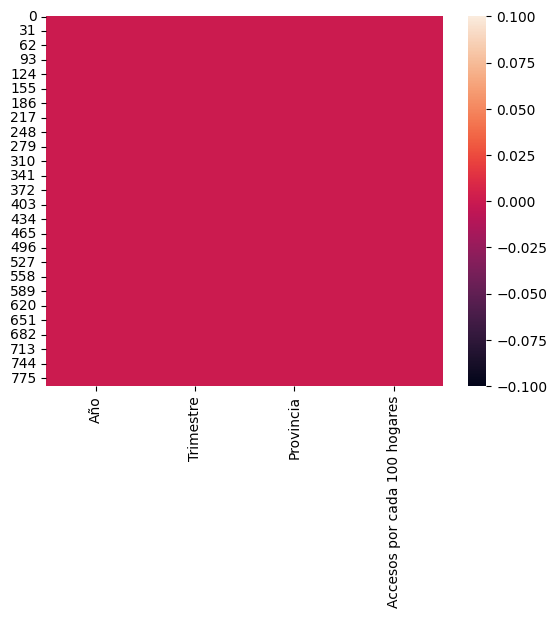

In [387]:
sns.heatmap(penet_100hog.isnull())

Vamos a analizar individualmente los valores de las columnas con la finalidad de entender mejor su contenido y para detectar si hay errores evidentes de carga.

In [388]:
penet_100hog['Año'].unique() # Apreciamos que los datos van del año 2014 al 2022.

array([2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014], dtype=int64)

In [389]:
penet_100hog['Trimestre'].unique() # se aplica a los cuatro trimestres del año.

array([1, 4, 3, 2], dtype=int64)

In [390]:
penet_100hog['Provincia'].unique() # abarca las 23 provincias y el distrito federal, es decir la totalidad de argentina.

array(['Buenos Aires', 'Capital Federal', 'Catamarca', 'Chaco', 'Chubut',
       'Córdoba', 'Corrientes', 'Entre Ríos', 'Formosa', 'Jujuy',
       'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquén',
       'Río Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz',
       'Santa Fe', 'Santiago Del Estero', 'Tierra Del Fuego', 'Tucumán'],
      dtype=object)

In [391]:
penet_100hog['Accesos por cada 100 hogares'].unique() # vemos que hay gran variedad de datos. Se evaluara si conviene hacer rangos. 

array([ 76.08, 111.8 ,  58.21,  44.06,  88.05,  85.76,  47.64,  63.7 ,
        34.96,  58.06,  91.66,  78.77,  48.74,  49.04,  74.17,  67.04,
        56.11,  43.55,  80.72,  43.34,  77.3 ,  47.17,  98.29,  57.39,
        75.66, 111.27,  55.25,  44.05,  82.57,  84.51,  45.51,  63.16,
        34.45,  56.92,  89.57,  77.92,  47.51,  49.06,  73.3 ,  65.69,
        56.81,  39.59,  80.3 ,  43.05,  77.09,  47.05,  98.4 ,  55.93,
        71.68,  52.71,  42.96,  80.71,  81.28,  44.9 ,  62.18,  33.96,
        55.69,  84.28,  77.26,  45.55,  45.57,  69.71,  61.97,  55.96,
        39.46,  79.87,  43.75,  75.02,  47.  ,  94.95,  54.64,  70.  ,
       110.14,  52.34,  43.33,  72.29,  80.12,  43.54,  61.66,  33.23,
        56.18,  82.08,  76.98,  40.97,  45.01,  69.14,  61.94,  54.93,
        39.28,  83.48,  44.01,  75.07,  46.56,  67.89,  69.11, 108.42,
        48.9 ,  43.14,  68.99,  78.59,  42.66,  60.44,  32.73,  55.63,
        81.78,  49.81,  39.15,  43.17,  66.84,  60.88,  53.93,  39.06,
      

In [392]:
penet_100hog['Accesos por cada 100 hogares'].min()

9.35

In [393]:
penet_100hog['Accesos por cada 100 hogares'].max()

124.06

In [394]:
penet_100hog['Accesos por cada 100 hogares'].mean()

47.90718434343434

**II.-Internet fijo por velocidad bajada y provincia.**

Apreciamos que contiene 432 filas, 97 columnas, 94 numérica y 1 string (Porvincia) y 2 que se refieren a fechas y que probablemente sea conveniente vincularlas a un calendario en Powerby. 

Nos brinda información concerniente a la potencia del acceso a internet cada 100 hogares teniendo en cuenta el año, trimestre y provincia, por lo tanto permite ver su evolución en el tiempo y el nivel de acceso de cada provincia. 

No utilizaremos este dataset porque creemos que se trata de manera mas ordenada y adecuada para el proposito de nuestro proyecto en el archivo que se analiza a continuación.

In [395]:
acc_velyprov.head()


,Año,Trimestre,Provincia,Otros,"0,256 Mbps","0,375 Mbps","0,625 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",...,70 Mbps,71 Mbps,75 Mbps,77 Mbps,78 Mbps,80 Mbps,81 Mbps,83 Mbps,82 Mbps,86 Mbps
0,2022.0,1.0,Buenos Aires,"26,280",19,- 0,- 0,"31,380",192,"5,958",...,"3,163",- 0,"100,884",- 0,4,212,- 0,2,- 0,- 0
1,2022.0,1.0,Capital Federal,"1,717",31,- 0,- 0,461,35,"1,407",...,3,- 0,"31,684",- 0,- 0,8,- 0,- 0,- 0,- 0
2,2022.0,1.0,Catamarca,"2,207",- 0,- 0,- 0,34,37,- 0,...,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0
3,2022.0,1.0,Chaco,"7,580",- 0,225,111,234,2,- 0,...,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0
4,2022.0,1.0,Chubut,"15,607",8,- 0,- 0,73,32,"1,069",...,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0


In [396]:
acc_velyprov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433 entries, 0 to 432
Data columns (total 97 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Año         432 non-null    float64
 1   Trimestre   432 non-null    float64
 2   Provincia   432 non-null    object 
 3   Otros       432 non-null    object 
 4   0,256 Mbps  432 non-null    object 
 5   0,375 Mbps  432 non-null    object 
 6   0,625 Mbps  432 non-null    object 
 7   0,5 Mbps    432 non-null    object 
 8   0,512 Mbps  432 non-null    object 
 9   0,75 Mbps   432 non-null    object 
 10  1 Mbps      432 non-null    object 
 11  1,2 Mbps    432 non-null    object 
 12  1,25 Mbps   432 non-null    object 
 13  1,5 Mbps    432 non-null    object 
 14  2 Mbps      432 non-null    object 
 15  2,2 Mbps    432 non-null    object 
 16  2,5 Mbps    433 non-null    object 
 17  6,7 Mbps    432 non-null    object 
 18  3 Mbps      432 non-null    object 
 19  3,2 Mbps    432 non-null    o

<AxesSubplot: >

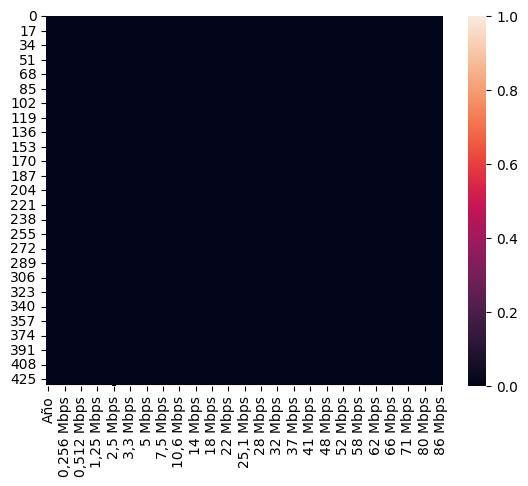

In [397]:
sns.heatmap(acc_velyprov.isnull())

Vamos a analizar individualmente los valores de las columnas con la finalidad de entender mejor su contenido y para detectar si hay errores evidentes de carga.

In [398]:
acc_velyprov['Año'].unique() # Apreciamos que los datos van del año 2017 al 2022 y también nan.

array([2022., 2021., 2020., 2019., 2018., 2017.,   nan])

In [399]:
acc_velyprov['Trimestre'].unique() # se aplica a los cuatro trimestres del año y también nan

array([ 1.,  4.,  3.,  2., nan])

In [400]:
acc_velyprov['Provincia'].unique() # abarca las 23 provincias y el distrito federal, es decir la totalidad de argentina.

array(['Buenos Aires', 'Capital Federal', 'Catamarca', 'Chaco', 'Chubut',
       'Córdoba', 'Corrientes', 'Entre Ríos', 'Formosa', 'Jujuy',
       'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquén',
       'Río Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz',
       'Santa Fe', 'Santiago Del Estero', 'Tierra Del Fuego', 'Tucumán',
       nan], dtype=object)

**III.-Acceso a Internet Fijo por rangos de velocidad de bajada y provincia.**

Apreciamos que contiene 792 filas, 12 columnas, 9 numéricas, 1 string (provincia) y 2 que se refieren a fechas que  probablemente sea necesario vincularlas a un calendario en Powerby. Además,  las columnas numéricas tiene los miles marcados con '.' los que se reemplazaran en forma conjunta con la incorporación de los datos. No vemos valores faltantes.

Nos brinda información concerniente a la calidad de los accesos a internet teniendo en cuenta el año, trimestre y provincia y por lo tanto permite ver su evolucion en el tiempo y como se compone la potencia del mismo en cada provincia. 

Los mencionados datos puede permitir inferir si un determinado servicio de internet va a tener menor o mayor aceptación teniendo en cuenta la calidad del mismo.

In [401]:
acc_ranvelyprov.head()


,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2022,1,Buenos Aires,31591,30056,313382,321756,290127,161183,3381049,26280.0,4555424
1,2022,1,Capital Federal,527,5575,39918,77390,61053,43289,1188072,1717.0,1417541
2,2022,1,Catamarca,71,456,4386,7009,8773,3761,35715,2207.0,62378
3,2022,1,Chaco,461,1099,16888,21235,20898,13012,62946,7580.0,144119
4,2022,1,Chubut,113,1677,61369,31856,33080,13871,14055,15607.0,171628


In [402]:
acc_ranvelyprov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Año                  792 non-null    int64  
 1   Trimestre            792 non-null    int64  
 2   Provincia            792 non-null    object 
 3   HASTA 512 kbps       792 non-null    int64  
 4   + 512 Kbps - 1 Mbps  792 non-null    int64  
 5   + 1 Mbps - 6 Mbps    792 non-null    int64  
 6   + 6 Mbps - 10 Mbps   792 non-null    int64  
 7   + 10 Mbps - 20 Mbps  792 non-null    int64  
 8   + 20 Mbps - 30 Mbps  792 non-null    int64  
 9   + 30 Mbps            792 non-null    int64  
 10  OTROS                786 non-null    float64
 11  Total                792 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 74.4+ KB


<AxesSubplot: >

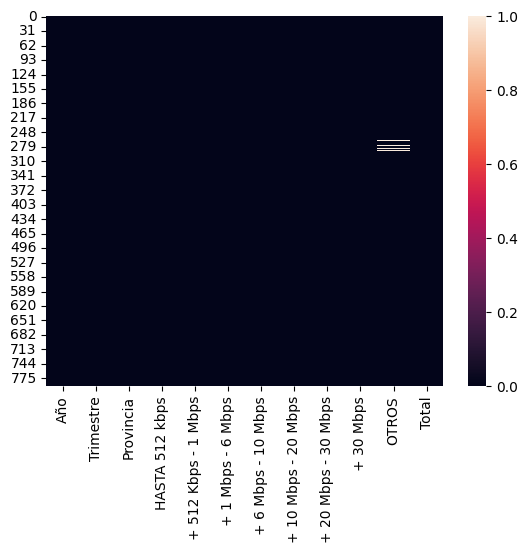

In [403]:
sns.heatmap(acc_ranvelyprov.isnull())

Vamos a analizar individualmente los valores de las columnas con la finalidad de entender mejor su contenido y para detectar si hay errores evidentes de carga.

In [404]:
acc_ranvelyprov['Año'].unique() # Apreciamos que los datos van del año 2014 al 2022.

array([2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014], dtype=int64)

In [405]:
acc_ranvelyprov['Trimestre'].unique() # se aplica a los cuatro trimestres del año.

array([1, 4, 3, 2], dtype=int64)

In [406]:
acc_ranvelyprov['Provincia'].unique() # abarca las 23 provincias y el distrito federal, es decir la totalidad de argentina.

array(['Buenos Aires', 'Capital Federal', 'Catamarca', 'Chaco', 'Chubut',
       'Córdoba', 'Corrientes', 'Entre Ríos', 'Formosa', 'Jujuy',
       'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquén',
       'Río Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz',
       'Santa Fe', 'Santiago Del Estero', 'Tierra Del Fuego', 'Tucumán'],
      dtype=object)

In [407]:
acc_ranvelyprov['HASTA 512 kbps'].unique() 

array([ 31591,    527,     71,    461,    113,    100,     67,    107,
           97,     58,    301,     18,    114,     51,    137,    116,
           26,     61,    468,    178,     24,     39,  37821,    563,
          126,     84,    156,    140,     44,     62,     52,    467,
        37193,    295,    104,     99,    381,     48,    298,     36,
          112,    125,    101,     60,     50,    123,     17,     32,
        37192,    294,  36939,    135,    106,     93,    105,     56,
           49,     28,    109,     25,    518,     29,    119,     47,
        37542,    264,     63,    308,    158,    168,     72,    130,
          391,     55,    293,     21,    218,    129,     66,    568,
          133,     11,  38215,    142,   1127,    696,  33489,    307,
           83,    746,    149,    698, 238920,     34,     69,     74,
           10,     19,   1110,     27,    237,      9,     45,     22,
           57,    640,      6,     16, 199768,     81,    236,     20,
      

In [408]:
acc_ranvelyprov['+ 512 Kbps - 1 Mbps'].unique() 

array([ 30056,   5575,    456,   1099,   1677,  12782,   4029,   5745,
          448,   1761,   2223,    778,   3355,   3873,   1123,   1383,
         1725,   2269,    643,   6898,  12435,   1401,    894,   2212,
        11026,   1695,      0,    112,   1294,   2479,    645,   3024,
          175,    493,      1,   1463,      5,    940,   1174,     20,
         1442,    264,    297,    581,    909,    385,     97,  31149,
          603,    105,   2452,    313,     31,    327,    557,    333,
          579,  31178,    554,    896,  31187,    244,    109,   2386,
          527,   2911,     40,    524,    466,    194,    891,  31197,
          182,    514,  31514,    312,   3064,    151,    810,   1241,
        31606,    928,   4383,   3679,   2061,   1779,  36802,   5128,
         4081,    342,    811,     11,   2994,  27537,     15,      4,
          191,      9,    908,  44648,    368,     43,   1216,    840,
         5824,    597,   4446,    349,    885,   3289,     10,   1269,
      

In [409]:
acc_ranvelyprov['+ 1 Mbps - 6 Mbps'].unique() 

array([ 313382,   39918,    4386,   16888,   61369,  165922,   24563,
         50075,   24113,   22141,   62812,    3576,   51230,   35655,
         39856,   35565,   35576,   32356,    8287,   12710,  143796,
         30220,   12849,   36028,  352950,   47133,    6038,   18845,
         63698,  184548,   28830,   56043,   22908,   22446,   64840,
          5018,   66428,   41916,   42313,   38373,   40673,   28906,
          8550,   20305,  169706,   31915,   13505,   37321, 1108940,
        156978,    6755,   22545,   89168,  204989,   29629,   61354,
         22778,   23884,   65063,    5366,  151871,   41932,   57441,
         68991,   41431,   59873,   11552,   30561,  193207,   32752,
         23723,   39446, 1096049,  157558,    7219,   23444,   89639,
        201757,   29419,   63518,   22364,   24182,   64146,    5312,
        137462,   41643,   57713,   69356,   42543,   59989,   11752,
         30595,  202018,   32034,   21335,   40224, 1108368,  159662,
          7423,   24

In [410]:
acc_ranvelyprov['+ 6 Mbps - 10 Mbps'].unique() 

array([321756,  77390,   7009,  21235,  31856, 126009,  25665,  49620,
         6945,  16321,   9869,   4692,  26407,  22261,  15623,  18859,
        68246,  11914,   3837,  11502, 208361,  61170,  15640,  46961,
       331292,  81899,   7855,  22678,  39568, 130892,  26368,  49636,
         6983,  16793,   9082,   5437,  30308,  23554,  13264,  19878,
        69324,  10955,   4276,  11641, 206856,  61524,  16534,  48736,
       248153,  67013,   8428,  20986,  26281, 141285,  28478,  59776,
         7142,  16417,   7395,   5979,  12640,  25099,   8566,   3730,
        70104,    752,   2405,   8365, 201250,  61838,  13397,  50293,
       244001,  73568,   9091,  21574,  22605, 136516,  27037,  55349,
         7310,  16577,   7769,   5971,  10886,  25907,   8631,   3663,
        67012,    784,   2703,   8463, 204077,  62224,   6913,  51648,
       240520,  76753,   8455,  22102,  21401, 135092,  26223,  56060,
         7569,  17293,   7864,   5968,  11216,  25503,   8443,   4187,
      

In [411]:
acc_ranvelyprov['+ 10 Mbps - 20 Mbps'].unique() 

array([290127,  61053,   8773,  20898,  33080,  73967,  27077,  42294,
         6613,  37923,  12044,  23624,  74178,  26855,  11163,  26926,
         6313,  25144,   9802,  12277,  84787,  13542,  18034,  21014,
       297296,  66135,   9804,  21937,  31175,  76246,  22922,  38295,
         6811,  38134,  12259,  23559,  75214,  26721,  10515,  31255,
         6642,  23978,   9107,  13054,  85690,  12205,  16562,  21023,
       141383,  39785,  10517,  23852,  18538,  65050,  24792,  39114,
         6978,  37755,   8737,  23315,  62628,  26079,   6234,  14880,
         6962,  13250,   6491,   6799,  83941,  11274,   9782,  21986,
       140322,  43859,   6828,  24032,  16604,  66950,  24524,  39468,
         7460,  37908,   8128,  23298,  56117,  25811,   5871,  15019,
         7099,  12550,   5418,   6888,  80452,  10359,   4580,  23732,
       163747,  56457,  10115,  27556,  15392,  74659,  26169,  42432,
         7916,  40649,   7611,   4604,  52533,  27101,   5903,  13045,
      

In [412]:
acc_ranvelyprov['+ 20 Mbps - 30 Mbps'].unique() 

array([161183,  43289,   3761,  13012,  13871,  34892,  10452,  21578,
          716,    576,   5250,   5645,  21566,  15854,   2654,  14144,
         2214,   2088,  68612,   2628,  58018,    849,   1767,   5211,
       196021,  66755,   3262,  13692,   5780,  41198,  10087,  24068,
         1135,    564,   4821,   5671,  18621,  15954,   3310,   4130,
         3535,    398,  67363,   1770,  62349,    800,   1748,   5326,
       192797,  73502,   1659,  14412,   5320,  47198,   9687,  16284,
         1192,    561,   4023,   4868,   7596,  14792,   3631,   2282,
         3878,    338,  67942,   1788,  55080,    801,   1433,   5300,
       236897,  86655,   4941,  16069,   3896,  70824,  10059,  18484,
         1341,    607,   3399,   4825,   4403,  16172,   5943,   3867,
         9654,    340,  65946,   1575,  75195,    811,    476,   5022,
       222061,  83255,    712,  14496,   2844,  71984,   9001,  15774,
         1215,    568,   2786,    215,   4061,  14050,   5677,   3642,
      

In [413]:
acc_ranvelyprov['+ 30 Mbps'].unique() 

array([3381049, 1188072,   35715,   62946,   14055,  577027,   43631,
         81757,   15028,   35287,   14400,   45970,   95048,   58610,
         71238,   37729,   76838,   11916,      13,    2551,  344170,
          8309,     982,  133846, 3259793, 1147939,   29827,   58435,
          2904,  538700,   39911,   77290,   13775,   33421,   12184,
         43424,   75031,   54596,   69217,   36142,   72622,    9800,
             9,     876,  322015,    7537,    1017,  125857, 2482266,
       1075229,   26618,   49705,    1643,  476459,   35468,   67961,
         12707,   29917,   10506,   42613,   21087,   42291,   57919,
         34011,   67010,     278,      22,     678,  290793,    6863,
           976,  115154, 2337604, 1037752,   25388,   47239,    1112,
        442357,   32697,   61605,   11077,   29950,    9311,   42158,
         20686,   38308,   54008,   31488,   58882,     676,  262124,
          6064,     889,  109616, 2246313, 1003041,   22996,   42462,
        402191,   27

In [414]:
acc_ranvelyprov['OTROS'].unique() 

array([ 2.62800e+04,  1.71700e+03,  2.20700e+03,  7.58000e+03,
        1.56070e+04,  1.31040e+04,  7.09400e+03,  1.67500e+04,
        5.88000e+02,  2.44200e+03,  2.83300e+03,  0.00000e+00,
        3.28700e+03,  8.34900e+03,  7.88500e+03,  2.26520e+04,
        6.48900e+03,  2.46500e+03,  2.85890e+04,  4.85000e+02,
        1.84440e+04,  7.92000e+02,  2.42100e+03,  2.73000e+02,
        2.29580e+04,  2.23300e+03,  7.58500e+03,  1.57630e+04,
        1.26070e+04,  7.08200e+03,  1.65830e+04,  1.96700e+03,
        2.32400e+03,  3.02700e+03,  3.66000e+02,  8.33500e+03,
        7.76700e+03,  2.26450e+04,  6.47500e+03,  4.43500e+03,
        2.92180e+04,  4.91000e+02,  1.87770e+04,  7.93000e+02,
        2.58000e+03,  2.40000e+02,  9.72800e+03,  2.20600e+03,
        7.95800e+03,  1.49070e+04,  9.25600e+03,  5.05300e+03,
        1.27550e+04,  1.61700e+03,  2.40100e+03,  4.15200e+03,
        5.00000e+01,  8.27900e+03,  5.57900e+03,  2.00090e+04,
        6.32700e+03,  4.64100e+03,  2.93920e+04,  7.350

In [415]:
acc_ranvelyprov['Total'].unique()

array([4555424, 1417541,   62378,  144119,  171628, 1003803,  142578,
        267926,   54548,  116509,  109732,   84303,  275185,  171508,
        149679,  157374,  197515,   88178,  119844,   49102,  870479,
        116461,   52611,  245584, 4509157, 1412119,   59090,  143745,
        160308,  986770,  135912,  265046,   53663,  113915,  107007,
         83128,  267587,  171132,  147466,  153753,  199405,   79958,
        118849,   48486,  866441,  115861,   52357,  238639, 4251609,
       1413405,   56254,  139871,  156066,  946788,  133819,  260375,
         52795,  111158,  100487,   82160,  255939,  158528,  139809,
        144585,  195833,   79483,  117864,   48976,  841584,  115458,
         50223,  232472, 4132351, 1400355,   55744,  140729,  139237,
        930880,  129501,  257632,   51551,  111848,   97667,   81602,
        229671,  156176,  138250,  144084,  191639,   78933,  122818,
         48982,  840600,  114090,   35693,  233051, 4060002, 1379673,
         51968,  139

**IV.-Acceso a Internet fijo por tecnología y provincia.**

Apreciamos que contiene 793 filas (una extra ), 9 columnas, 6 numéricas, 1 string (provincia) y 2 que se refieren a fechas que  probablemente sea necesario vincularlas a un calendario en Powerby. 

Además,  las columnas numéricas tiene los miles marcados con '.' los que se reemplazaran en forma conjunta con la incorporación de los datos. Ademas, también detectamos que existen valores '-0' lo que hace necesario realizar una normalización mas especifica. Algo similiarsucede con las columnas años y trimestres que tienen * en algunos de sus valores.
No vemos valores faltantes, solo en la última fila que debe ser eliminada.

Nos brinda información concerniente a los tipos de tecnologías de accesos a internet teniendo en cuenta el año, trimestre y provincia y por lo tanto permite ver su evolucion en el tiempo y cual es la composición de cada provincia. 

Los mencionados datos puede permitir inferir si un determinada tecnología continúa vigente y si su adopcion se encuentra en crecimiento, estancada o decreciendo.

In [416]:
acc_tecyprov.head()


,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022,1,Buenos Aires,392045.0,2.728.865,1.242.121,125.521,66872.0,4555424.0
1,2022,1,Capital Federal,102290.0,1.217.225,62.308,5.784,29934.0,1417541.0
2,2022,1,Catamarca,14181.0,15.517,29.118,1.328,2234.0,62378.0
3,2022,1,Chaco,32391.0,64.546,36.662,8.164,2356.0,144119.0
4,2022,1,Chubut,44133.0,66.667,9.184,30.592,21052.0,171628.0


In [417]:
acc_tecyprov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           793 non-null    object 
 1   Trimestre     793 non-null    object 
 2   Provincia     792 non-null    object 
 3   ADSL          792 non-null    float64
 4   Cablemodem    792 non-null    object 
 5   Fibra óptica  792 non-null    object 
 6   Wireless      792 non-null    object 
 7   Otros         792 non-null    float64
 8   Total         792 non-null    float64
dtypes: float64(3), object(6)
memory usage: 55.9+ KB


<AxesSubplot: >

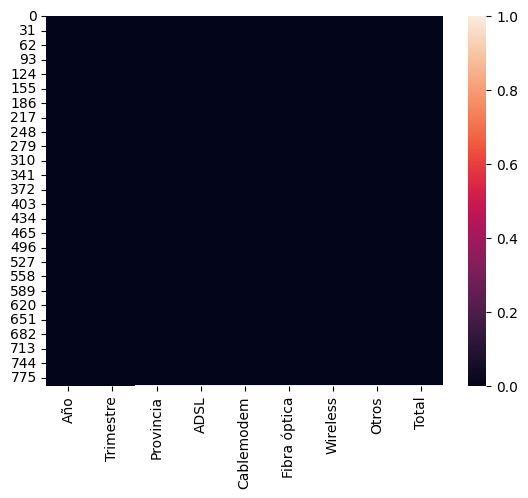

In [418]:
sns.heatmap(acc_tecyprov.isnull())

In [419]:
acc_tecyprov["Cablemodem"] = acc_tecyprov["Cablemodem"].str.replace('.','')
acc_tecyprov["Fibra óptica"] = acc_tecyprov["Fibra óptica"].str.replace('.','')
acc_tecyprov["Wireless"] = acc_tecyprov["Wireless"].str.replace('.','')

C:\Users\guill\AppData\Local\Temp\ipykernel_24000\1132762989.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  acc_tecyprov["Cablemodem"] = acc_tecyprov["Cablemodem"].str.replace('.','')
C:\Users\guill\AppData\Local\Temp\ipykernel_24000\1132762989.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  acc_tecyprov["Fibra óptica"] = acc_tecyprov["Fibra óptica"].str.replace('.','')
C:\Users\guill\AppData\Local\Temp\ipykernel_24000\1132762989.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  acc_tecyprov["Wireless"] = acc_

In [420]:
acc_tecyprov["Cablemodem"] = acc_tecyprov["Cablemodem"].str.replace('-','')
acc_tecyprov["Fibra óptica"] = acc_tecyprov["Fibra óptica"].str.replace('-','')
acc_tecyprov["Wireless"] = acc_tecyprov["Wireless"].str.replace('-','')

In [421]:
acc_tecyprov[["Año", "Trimestre"]] = acc_tecyprov[["Año", "Trimestre"]].applymap(lambda x: x.replace('*',''))

In [422]:
acc_tecyprov.drop(792, axis=0, inplace=True)

In [423]:
acc_tecyprov["Cablemodem"] = pd.to_numeric(acc_tecyprov["Cablemodem"])
acc_tecyprov["Fibra óptica"] = pd.to_numeric(acc_tecyprov["Fibra óptica"])
acc_tecyprov["Wireless"] = pd.to_numeric(acc_tecyprov["Wireless"])
acc_tecyprov["Año"] = pd.to_numeric(acc_tecyprov["Año"])
acc_tecyprov["Trimestre"] = pd.to_numeric(acc_tecyprov["Trimestre"])

Vamos a analizar individualmente los valores de las columnas con la finalidad de entender mejor su contenido y para detectar si hay errores evidentes de carga.

In [424]:
acc_tecyprov['Año'].unique() # Apreciamos que los datos van del año 2014 al 2022, pero se detectan '*' 

array([2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014], dtype=int64)

In [425]:
acc_tecyprov['Trimestre'].unique() # se aplica a los cuatro trimestres del año, pero se detectan '*'

array([1, 4, 3, 2], dtype=int64)

In [426]:
acc_tecyprov['Provincia'].unique() # abarca las 23 provincias y el distrito federal, es decir la totalidad de argentina.

array(['Buenos Aires', 'Capital Federal', 'Catamarca', 'Chaco', 'Chubut',
       'Córdoba', 'Corrientes', 'Entre Ríos', 'Formosa', 'Jujuy',
       'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquén',
       'Río Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz',
       'Santa Fe', 'Santiago Del Estero', 'Tierra Del Fuego', 'Tucumán'],
      dtype=object)

In [427]:
acc_tecyprov['ADSL'].unique() 

array([ 392045.,  102290.,   14181.,   32391.,   44133.,  195610.,
         40462.,   67159.,   16397.,   21307.,    8003.,    9103.,
         49464.,   39147.,   28443.,   38662.,   44714.,   34038.,
          7987.,   10537.,  213486.,   18118.,   13031.,   92532.,
        426325.,  111360.,   16385.,   35548.,   46361.,  212011.,
         42523.,   70459.,   17211.,   22330.,    8175.,   10387.,
         59842.,   41778.,   29175.,   42037.,   46972.,   35868.,
          8472.,   10790.,  233427.,   19032.,   13317.,   97830.,
        585729.,  142902.,   18413.,   38258.,   49269.,  229275.,
         44805.,   74443.,   18093.,   23554.,    9015.,   11329.,
         91474.,   43230.,   29650.,   47934.,   49212.,   40072.,
          8417.,   12347.,  245929.,   19939.,   12853.,  104489.,
        603255.,  148989.,   20305.,   39826.,   49271.,  239780.,
         46648.,   77836.,   19571.,   24738.,    9017.,   11627.,
         91503.,   44960.,   30083.,   48189.,   51396.,  2567

In [428]:
acc_tecyprov['Cablemodem'].unique() 

array([2728865, 1217225,   15517,   64546,   66667,  501799,   79093,
        138986,   15927,   60616,   58978,   59228,   74145,   91752,
         73200,   45366,   98667,   14449,   11296,   23420,  444609,
         87979,   38700,   62396, 2706506, 1205128,   13858,   63145,
         57412,  487489,   71183,  133387,   15111,   60511,   58000,
         56651,   71553,   92068,   72761,   44495,   99808,   13102,
         11064,   22902,  444373,   86563,   38148,   59022, 2595485,
       1192107,   11709,   63659,   55794,  477223,   69403,  128752,
         14111,   60758,   57881,   54744,   71247,   89469,   73794,
         44519,   98318,   12922,   11884,   22961,  443156,   85535,
         36958,   53868, 2503830, 1175097,    9426,   62948,   41497,
        467782,   67262,  124957,   12509,   60800,   57014,   54255,
         70834,   87861,   72690,   43761,   96016,   12369,   11308,
         22967,  431915,   83770,   22504,   48359, 2452056, 1145093,
          4409,   61

In [429]:
acc_tecyprov['Fibra óptica'].unique() 

array([1242121,   62308,   29118,   36662,    9184,  235838,   10875,
         23091,    5146,   25949,   21739,    9546,  123228,   25178,
         24193,   38037,   40994,   11294,      31,   10766,  146552,
          1093,     416,   86174, 1176024,   60005,   25100,   34688,
          9655,  217214,   10138,   23452,    5151,   24156,   20192,
          9446,  109667,   22035,   23253,   32212,   39555,   11072,
            30,   10031,  128856,    1088,     426,   78790,  885613,
         42966,   22331,   27583,    8946,  167495,    7542,   20485,
          4730,   19926,   17817,    9444,   70579,   10969,   16455,
         18725,   36126,    6670,      27,    6328,   93412,     909,
             6,   70964,  854173,   41318,   27584,    6081,  151855,
          3731,   17856,    3610,   19611,   17132,    9445,   44696,
         10376,   15619,   18727,   32050,    6673,      28,   90424,
         71683,  821597,   39980,   18688,   25426,    3444,  134634,
          3337,   16

In [430]:
acc_tecyprov['Wireless'].unique() 

array([125521,   5784,   1328,   8164,  30592,  60843,   6774,  26098,
        16876,   4662,  19903,   6395,  26969,   7807,  23098,  16815,
         5950,  20723,  71809,   3974,  45261,   6349,    124,   3995,
       126887,   5679,   1512,   8005,  28041,  61277,   6778,  25022,
        16018,   2927,  19286,   6613,  24666,   7649,  21531,  16558,
         5882,  11423,  70560,   4346,  43556,   6256,   2511, 120228,
         6059,   1568,   8018,  23376,  57617,   6766,  23500,  15690,
         2952,  14479,  21811,   7198,  19270,  15031,   5724,  11372,
        68856,   4269,  43447,   6147,     16,   2408, 113546,   5580,
         1449,  23682,  55944,   6557,  23786,   2731,  13209,   6245,
         5317,  19218,  66860,  43997,   5081,     14,   1837,  98806,
         5559,    322,   8004,  23723,  54137,   5949,  20836,  15669,
         2677,  12369,    250,  18332,   4796,  17752,  13994,   5669,
        11482,  63826,   4264,  39140,   5158,      0,   1834,  93444,
      

In [431]:
acc_tecyprov['Otros'].unique() 

array([6.6872e+04, 2.9934e+04, 2.2340e+03, 2.3560e+03, 2.1052e+04,
       9.7130e+03, 5.3740e+03, 1.2592e+04, 2.0200e+02, 3.9750e+03,
       1.1090e+03, 3.1000e+01, 1.3790e+03, 7.6240e+03, 7.4500e+02,
       1.8494e+04, 7.1900e+03, 7.6740e+03, 2.8721e+04, 4.0500e+02,
       2.0571e+04, 2.9220e+03, 3.4000e+02, 4.8700e+02, 7.3415e+04,
       2.9947e+04, 2.2350e+03, 2.3590e+03, 1.8839e+04, 8.7790e+03,
       5.2900e+03, 1.2726e+04, 1.7200e+02, 3.9910e+03, 1.3540e+03,
       1.8590e+03, 7.6020e+03, 7.4600e+02, 1.8451e+04, 7.1880e+03,
       8.4930e+03, 2.8723e+04, 4.1700e+02, 1.6229e+04, 3.4200e+02,
       4.8600e+02, 6.4554e+04, 2.9371e+04, 2.2330e+03, 2.3530e+03,
       1.8681e+04, 1.5178e+04, 5.3030e+03, 1.3195e+04, 1.7100e+02,
       3.9680e+03, 1.2950e+03, 3.0000e+01, 8.2800e+02, 7.6620e+03,
       6.4000e+02, 1.8376e+04, 6.4530e+03, 8.4470e+03, 2.8680e+04,
       3.0710e+03, 1.5640e+04, 2.9280e+03, 3.9000e+02, 7.4300e+02,
       5.7547e+04, 1.8706e+04, 1.5519e+04, 1.3197e+04, 8.2700e

In [432]:
acc_tecyprov['Total'].unique() 

array([4555424., 1417541.,   62378.,  144119.,  171628., 1003803.,
        142578.,  267926.,   54548.,  116509.,  109732.,   84303.,
        275185.,  171508.,  149679.,  157374.,  197515.,   88178.,
        119844.,   49102.,  870479.,  116461.,   52611.,  245584.,
       4509157., 1412119.,   59090.,  143745.,  160308.,  986770.,
        135912.,  265046.,   53663.,  113915.,  107007.,   83128.,
        267587.,  171132.,  147466.,  153753.,  199405.,   79958.,
        118849.,   48486.,  866441.,  115861.,   52357.,  238639.,
       4251609., 1413405.,   56254.,  139871.,  156066.,  946788.,
        133819.,  260375.,   52795.,  111158.,  100487.,   82160.,
        255939.,  158528.,  139809.,  144585.,  195833.,   79483.,
        117864.,   48976.,  841584.,  115458.,   50223.,  232472.,
       4132351., 1400355.,   55744.,  140729.,  139237.,  930880.,
        129501.,  257632.,   51551.,  111848.,   97667.,   81602.,
        229671.,  156176.,  138250.,  144084.,  191639.,   789

**V.-Accesos a banda ancha y banda angosta por provincia.**

Apreciamos que contiene 792 filas, 6 columnas, 3 numéricas, 1 string (provincia) y 2 que se refieren a fechas que  probablemente sea necesario vincularlas a un calendario en Powerby. 

Además,  las columnas numéricas tiene los miles marcados con '.' los que se reemplazaran en forma conjunta con la incorporación de los datos. Ademas, también detectamos que existen valores '-0' lo que hace necesario realizar una normalización mas especifica en la columna dial up.

Nos brinda información concerniente al acceso a internet por banda ancha y dial up teniendo en cuenta el año, trimestre y provincia y por lo tanto permite ver su evolucion en el tiempo y cual es la composición de cada provincia. 



In [433]:
acc_bandayprov.head()


,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
0,2022,1,Buenos Aires,4549131,6.293,4555424
1,2022,1,Capital Federal,1415378,2.163,1417541
2,2022,1,Catamarca,62377,1,62378
3,2022,1,Chaco,144114,5,144119
4,2022,1,Chubut,170701,927,171628


In [434]:
acc_bandayprov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Año               792 non-null    int64 
 1   Trimestre         792 non-null    int64 
 2   Provincia         792 non-null    object
 3   Banda ancha fija  792 non-null    int64 
 4   Dial up           790 non-null    object
 5   Total             792 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 37.2+ KB


<AxesSubplot: >

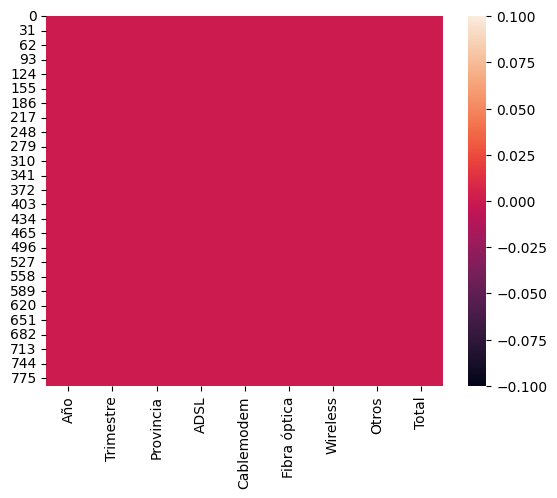

In [435]:
sns.heatmap(acc_tecyprov.isnull())

Apreciamos que contiene 792 filas, 12 columnas, 8 numericas y 4 que no. Vemos que la 0 y 1 se refieren a fechas y que probablemente sea conveniente vincularlas a un calendario en Powerby. Además, el resto, con excepción de Provincia, debe ser de tipo float, pero se deben hacer correcciones en cuanto a los puntos. 

In [436]:
acc_bandayprov['Dial up'] = acc_bandayprov['Dial up'].str.replace('.','')
acc_bandayprov['Dial up'] = acc_bandayprov['Dial up'].str.replace('-','')

C:\Users\guill\AppData\Local\Temp\ipykernel_24000\2441143313.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  acc_bandayprov['Dial up'] = acc_bandayprov['Dial up'].str.replace('.','')


In [437]:
acc_bandayprov['Dial up']= pd.to_numeric(acc_bandayprov['Dial up'])

Vamos a analizar individualmente los valores de las columnas con la finalidad de entender mejor su contenido y para detectar si hay errores evidentes de carga.

In [438]:
acc_bandayprov['Año'].unique() # Apreciamos que los datos van del año 2014 al 2022.

array([2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014], dtype=int64)

In [439]:
acc_bandayprov['Trimestre'].unique() # se aplica a los cuatro trimestres del año.

array([1, 4, 3, 2], dtype=int64)

In [440]:
acc_bandayprov['Provincia'].unique() # abarca las 23 provincias y el distrito federal, es decir la totalidad de argentina.

array(['Buenos Aires', 'Capital Federal', 'Catamarca', 'Chaco', 'Chubut',
       'Córdoba', 'Corrientes', 'Entre Ríos', 'Formosa', 'Jujuy',
       'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquén',
       'Río Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz',
       'Santa Fe', 'Santiago Del Estero', 'Tierra Del Fuego', 'Tucumán'],
      dtype=object)

In [441]:
acc_bandayprov['Banda ancha fija'].unique() 

array([4549131, 1415378,   62377,  144114,  170701, 1003729,  142574,
        267904,   54548,  116509,  109560,   84299,  274399,  171508,
        149208,  156821,  197510,   87888,  119659,   48898,  870364,
        116459,   52298,  245554, 4502772, 1409935,   59089,  143740,
        159364,  986693,  135908,  265024,   53663,  113915,  106834,
         83124,  266783,  171132,  146989,  153189,  199399,   79667,
        118662,   48276,  866265,  115859,   52042,  238609, 4246425,
       1411797,   56253,  139868,  155266,  946726,  133816,  260360,
         52795,  111158,  100371,   82157,  255320,  158528,  139436,
        144084,  195831,   79227,  117716,   48779,  841433,  115457,
         49934,  232447, 4127167, 1398747,   55743,  140726,  138412,
        930818,  129498,  257617,   51551,  111848,   97551,   81599,
        229052,  156176,  137877,  143583,  191637,   78677,  122670,
         48785,  840449,  114089,   35404,  233026, 4054936, 1378283,
         51967,  139

In [442]:
acc_bandayprov['Dial up'].unique() 

array([6.2930e+03, 2.1630e+03, 1.0000e+00, 5.0000e+00, 9.2700e+02,
       7.4000e+01, 4.0000e+00, 2.2000e+01, 0.0000e+00, 1.7200e+02,
       7.8600e+02, 4.7100e+02, 5.5300e+02, 2.9000e+02, 1.8500e+02,
       2.0400e+02, 1.1500e+02, 2.0000e+00, 3.1300e+02, 3.0000e+01,
       6.3850e+03, 2.1840e+03, 9.4400e+02, 7.7000e+01, 1.7300e+02,
       8.0400e+02, 4.7700e+02, 5.6400e+02, 6.0000e+00, 2.9100e+02,
       1.8700e+02, 2.1000e+02, 1.7600e+02, 3.1500e+02, 5.1840e+03,
       1.6080e+03, 3.0000e+00, 8.0000e+02, 6.2000e+01, 1.5000e+01,
       1.1600e+02, 6.1900e+02, 3.7300e+02, 5.0100e+02, 2.5600e+02,
       1.4800e+02, 1.9700e+02, 1.5100e+02, 2.8900e+02, 2.5000e+01,
       8.2500e+02, 5.0660e+03, 1.3900e+03, 5.5000e+01, 1.3000e+01,
       6.1500e+02, 1.3700e+02, 5.1340e+03, 1.4100e+03, 8.1000e+02,
       1.1900e+02, 6.2300e+02, 3.7600e+02, 5.0400e+02, 2.5900e+02,
       2.0000e+02, 1.5000e+02, 2.3000e+01, 1.0119e+04, 3.4770e+03,
       9.0000e+00, 1.5240e+03, 1.0700e+02, 1.0000e+01, 4.5000e

In [443]:
acc_bandayprov['Total'].unique() 

array([4555424, 1417541,   62378,  144119,  171628, 1003803,  142578,
        267926,   54548,  116509,  109732,   84303,  275185,  171508,
        149679,  157374,  197515,   88178,  119844,   49102,  870479,
        116461,   52611,  245584, 4509157, 1412119,   59090,  143745,
        160308,  986770,  135912,  265046,   53663,  113915,  107007,
         83128,  267587,  171132,  147466,  153753,  199405,   79958,
        118849,   48486,  866441,  115861,   52357,  238639, 4251609,
       1413405,   56254,  139871,  156066,  946788,  133819,  260375,
         52795,  111158,  100487,   82160,  255939,  158528,  139809,
        144585,  195833,   79483,  117864,   48976,  841584,  115458,
         50223,  232472, 4132351, 1400355,   55744,  140729,  139237,
        930880,  129501,  257632,   51551,  111848,   97667,   81602,
        229671,  156176,  138250,  144084,  191639,   78933,  122818,
         48982,  840600,  114090,   35693,  233051, 4060002, 1379673,
         51968,  139

**VI.-Velocidad media de bajada de Internet fijo por provincia.**

Apreciamos que contiene 792 filas, 4 columnas, 1 numéricas, 1 string (provincia) y 2 que se refieren a fechas que  probablemente sea necesario vincularlas a un calendario en Powerby. 

No parece ser necesario ningun trabajo de transformación.

Nos brinda información concerniente a la media de bajada teniendo en cuenta el año, trimestre y provincia y por lo tanto permite ver su evolucion en el tiempo y cual es la composición de cada provincia. 

Es muy práctica, porque permite apreciar de modo muy sencillo la pontencia de la red y en consecuencia inferir si un servicio sería competitivo o no y el nivel de desarrollo en las diferentes provincias en un momento determinado.

In [444]:
velmed_xprov.head()


,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2022,1,Buenos Aires,63
1,2022,1,Capital Federal,88
2,2022,1,Catamarca,51
3,2022,1,Chaco,46
4,2022,1,Chubut,13


In [445]:
velmed_xprov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Año                     792 non-null    int64 
 1   Trimestre               792 non-null    int64 
 2   Provincia               792 non-null    object
 3   Mbps (Media de bajada)  792 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 24.9+ KB


<AxesSubplot: >

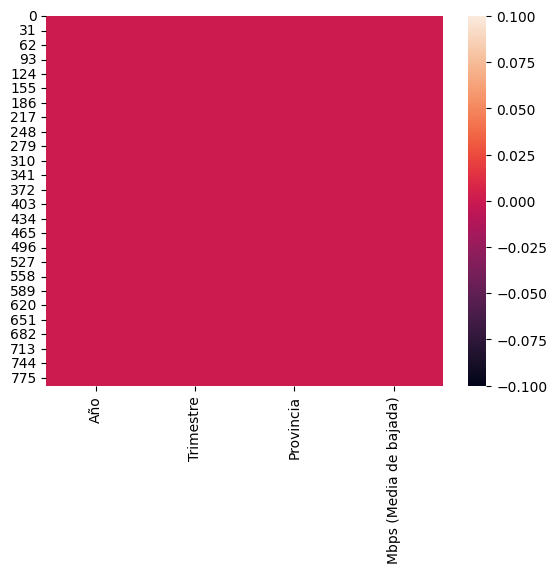

In [446]:
sns.heatmap(velmed_xprov.isnull())

Vamos a analizar individualmente los valores de las columnas con la finalidad de entender mejor su contenido y para detectar si hay errores evidentes de carga.

In [447]:
velmed_xprov['Año'].unique() # Apreciamos que los datos van del año 2014 al 2022.

array([2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014], dtype=int64)

In [448]:
velmed_xprov['Trimestre'].unique() # se aplica a los cuatro trimestres del año.

array([1, 4, 3, 2], dtype=int64)

In [449]:
velmed_xprov['Provincia'].unique() # abarca las 23 provincias y el distrito federal, es decir la totalidad de argentina.

array(['Buenos Aires', 'Capital Federal', 'Catamarca', 'Chaco', 'Chubut',
       'Córdoba', 'Corrientes', 'Entre Ríos', 'Formosa', 'Jujuy',
       'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquén',
       'Río Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz',
       'Santa Fe', 'Santiago Del Estero', 'Tierra Del Fuego', 'Tucumán'],
      dtype=object)

In [450]:
velmed_xprov['Mbps (Media de bajada)'].unique() 

array([63, 88, 51, 46, 13, 50, 38, 36, 30, 28, 15, 41, 26, 42, 43, 31, 37,
       12, 21, 11, 39, 14, 47, 60, 83,  9, 33, 29, 27, 40, 22, 34, 45, 56,
       78,  8, 32, 25,  7, 10, 53, 73, 24, 68, 67, 35, 20,  6, 48, 64, 18,
       17, 16, 23, 59, 19, 44,  5,  4,  3], dtype=int64)

<h4>a.-Nacionales.-<h4>

**I.-Penetración por hogares nacional de Internet fijo**

Apreciamos que contiene 33 filas, 5 columnas, 2 numéricas y 3 que se refieren a fechas que  probablemente sea necesario vincularlas a un calendario en Powerby.  

La quinta columna es redundante y se eliminará. Además, las columnas numéricas  tienen decimales con ',' los que se reemplazaran en forma conjunta con la incorporación de los datos. No vemos valores faltantes.

Nos brinda información concerniente a la cantidad de conexiones cada 100 hogares y cada 100 habitantes por año y trimestre a nivel nacional. Esto nos permite ver su evolucion en el tiempo. 

Se conserva por tener la distribución en basa a 100 habitantes y puede ser útil a los fines del proyecto.

In [451]:
penet_hog.head()


,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,2022,1,73.88,23.05,Ene-Mar 2022
1,2021,4,73.18,22.81,Oct-Dic 2021
2,2021,3,70.58,21.98,Jul-Sept 2021
3,2021,2,69.24,21.55,Abr-Jun 2021
4,2021,1,67.95,21.13,Ene-Mar 2021


In [452]:
penet_hog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           33 non-null     int64  
 1   Trimestre                     33 non-null     int64  
 2   Accesos por cada 100 hogares  33 non-null     float64
 3   Accesos por cada 100 hab      33 non-null     float64
 4   Periodo                       33 non-null     object 
dtypes: float64(2), int64(2), object(1)
memory usage: 1.4+ KB


<AxesSubplot: >

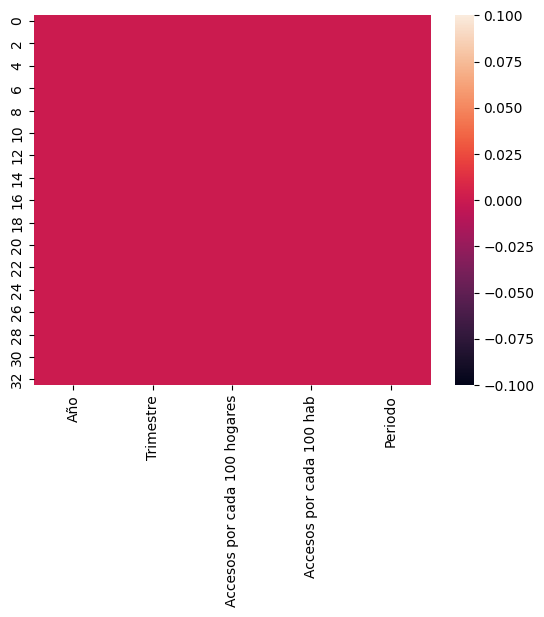

In [453]:
sns.heatmap(penet_hog.isnull())

In [454]:
penet_hog.drop('Periodo', axis=1, inplace=True)

Vamos a analizar individualmente los valores de las columnas con la finalidad de entender mejor su contenido y para detectar si hay errores evidentes de carga.

In [455]:
penet_hog['Año'].unique() # Apreciamos que los datos van del año 2014 al 2022.

array([2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014], dtype=int64)

In [456]:
penet_hog['Trimestre'].unique() # se aplica a los cuatro trimestres del año.

array([1, 4, 3, 2], dtype=int64)

In [457]:
penet_hog['Accesos por cada 100 hogares'].unique() 

array([73.88, 73.18, 70.58, 69.24, 67.95, 67.62, 66.31, 64.21, 62.86,
       62.92, 65.79, 64.53, 62.48, 61.42, 60.69, 59.16, 58.82, 57.78,
       56.9 , 54.9 , 54.16, 53.94, 53.73, 53.34, 51.85, 52.63, 52.46,
       51.76, 51.36, 50.5 , 50.67, 49.86, 49.55])

In [458]:
penet_hog['Accesos por cada 100 hogares'].min()

49.55

In [459]:
penet_hog['Accesos por cada 100 hogares'].max()

73.88

In [460]:
penet_hog['Accesos por cada 100 hogares'].mean()

59.303939393939395

In [461]:
penet_hog['Accesos por cada 100 hab'].unique() 

array([23.05, 22.81, 21.98, 21.55, 21.13, 21.01, 20.59, 19.92, 19.48,
       19.49, 20.36, 19.96, 19.31, 18.97, 18.73, 18.24, 18.12, 17.79,
       17.51, 16.88, 16.64, 16.56, 16.5 , 16.37, 15.9 , 16.12, 16.05,
       15.82, 15.68, 15.39, 15.43, 15.16, 15.05])

In [462]:
penet_hog['Accesos por cada 100 hab'].min()

15.05

In [463]:
penet_hog['Accesos por cada 100 hab'].max()

23.05

In [464]:
penet_hog['Accesos por cada 100 hab'].mean()

18.28939393939394

**II.-Velocidad Media de bajada de Internet fijo.**

Apreciamos que contiene 33 filas, 4 columnas, 1 numéricas y 3 que se refieren a fechas que  probablemente sea necesario vincularlas a un calendario en Powerby.  

La cuarta columna es redundante y se eliminará. Además, las columnas numéricas  tienen decimales con ',' los que se reemplazaran en forma conjunta con la incorporación de los datos. No vemos valores faltantes.

Nos brinda información concerniente a la media de bajada por año y trimestre a nivel nacional. Esto nos permite ver su evolución en el tiempo. 

Permite inferir de manera sencilla la evolución y la potencia de bajada en un determinado momento.

In [465]:
velmed.head()


,Año,Trimestre,Mbps (Media de bajada),Trimestre.1
0,2022,1,55.11,Ene-Mar 2022
1,2021,4,52.34,Oct-Dic 2021
2,2021,3,48.46,Jul-Sept 2021
3,2021,2,45.63,Abr-Jun 2021
4,2021,1,43.11,Ene-Mar 2021


In [466]:
velmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     33 non-null     int64  
 1   Trimestre               33 non-null     int64  
 2   Mbps (Media de bajada)  33 non-null     float64
 3   Trimestre.1             33 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.2+ KB


<AxesSubplot: >

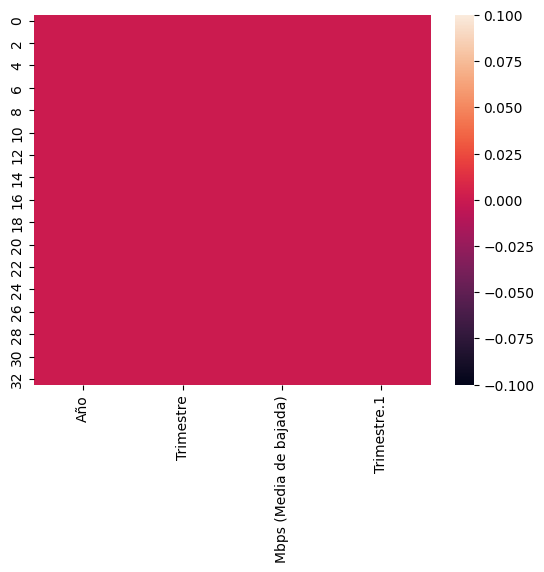

In [467]:
sns.heatmap(velmed.isnull())

In [468]:
velmed['Trimestre.1'].unique()

array(['Ene-Mar 2022', 'Oct-Dic 2021', 'Jul-Sept 2021', 'Abr-Jun 2021',
       'Ene-Mar 2021', 'Oct-Dic 2020', 'Jul-Sept 2020', 'Abr-Jun 2020',
       'Ene-Mar 2020', 'Oct-Dic 2019', 'Jul-Sept 2019', 'Abr-Jun 2019',
       'Ene-Mar 2019', 'Oct-Dic 2018', 'Jul-Sept 2018', 'Abr-Jun 2018',
       'Ene-Mar 2018', 'Oct-Dic 2017', 'Jul-Sept 2017', 'Abr-Jun 2017',
       'Ene-Mar 2017', 'Oct-Dic 2016', 'Jul-Sept 2016', 'Abr-Jun 2016',
       'Ene-Mar 2016', 'Oct-Dic 2015', 'Jul-Sept 2015', 'Abr-Jun 2015',
       'Ene-Mar 2015', 'Oct-Dic 2014', 'Jul-Sept 2014', 'Abr-Jun 2014',
       'Ene-Mar 2014'], dtype=object)

In [469]:
velmed.drop('Trimestre.1', axis=1, inplace=True)#Se elimina columna 4.

Vamos a analizar individualmente los valores de las columnas con la finalidad de entender mejor su contenido y para detectar si hay errores evidentes de carga.

In [470]:
velmed['Año'].unique() # Apreciamos que los datos van del año 2014 al 2022.

array([2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014], dtype=int64)

In [471]:
velmed['Trimestre'].unique() # se aplica a los cuatro trimestres del año.

array([1, 4, 3, 2], dtype=int64)

In [472]:
velmed['Mbps (Media de bajada)'].unique() # vemos que hay gran variedad de datos. Se evaluara si conviene hacer rangos. 

array([55.11, 52.34, 48.46, 45.63, 43.11, 42.36, 40.67, 38.32, 37.52,
       28.26, 24.18, 20.33, 17.38, 15.95, 15.36, 13.85, 13.22, 12.01,
        8.34,  7.16,  6.62,  6.34,  5.94,  5.42,  5.08,  4.99,  4.79,
        4.55,  4.35,  4.16,  3.87,  3.76,  3.62])

In [473]:
velmed['Mbps (Media de bajada)'].min()

3.62

In [474]:
velmed['Mbps (Media de bajada)'].max()

55.11

In [475]:
velmed['Mbps (Media de bajada)'].mean()

19.486363636363638

**III.-Distribución de los accesos totales nacionales a Internet fijo por velocidad.**

Apreciamos que contiene 33 filas, 12 columnas, 9 numéricas, 1 vacía y 2 que se refieren a fechas que  probablemente sea necesario vincularlas a un calendario en Powerby.  

Las columnas numéricas  tienen miles con '.' los que se reemplazaran en forma conjunta con la incorporación de los datos. No vemos valores faltantes.

Nos brinda información concerniente a a rangos de velocidad de bajada por año y trimestre a nivel nacional. Esto nos permite ver su evolución en el tiempo. 

Permite inferir de manera sencilla la composición de la velocidad de bajada en un determinado momento.

In [476]:
distr_totnac_vel.head()


,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total,Unnamed: 11
0,2022,1,34890,104840,1263273,1209148,967508,509830,6336187,198333,10624009,NaN
1,2021,4,41262,28521,1413208,1245333,976539,558358,6032322,194251,10489794,NaN
2,2021,3,40174,41437,2550229,1095772,710122,536364,4948174,163269,10085541,NaN
3,2021,2,40172,42024,2531271,1080279,693277,647401,4661291,167369,9863084,NaN
4,2021,1,39487,41674,2593477,1072722,737930,595920,4379965,186797,9647972,NaN


In [477]:
distr_totnac_vel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Año                      33 non-null     int64  
 1   Trimestre                33 non-null     int64  
 2   Hasta 512 kbps           33 non-null     int64  
 3   Entre 512 Kbps y 1 Mbps  33 non-null     int64  
 4   Entre 1 Mbps y 6 Mbps    33 non-null     int64  
 5   Entre 6 Mbps y 10 Mbps   33 non-null     int64  
 6   Entre 10 Mbps y 20 Mbps  33 non-null     int64  
 7   Entre 20 Mbps y 30 Mbps  33 non-null     int64  
 8   Más de 30 Mbps           33 non-null     int64  
 9   OTROS                    33 non-null     int64  
 10  Total                    33 non-null     int64  
 11  Unnamed: 11              0 non-null      float64
dtypes: float64(1), int64(11)
memory usage: 3.2 KB


<AxesSubplot: >

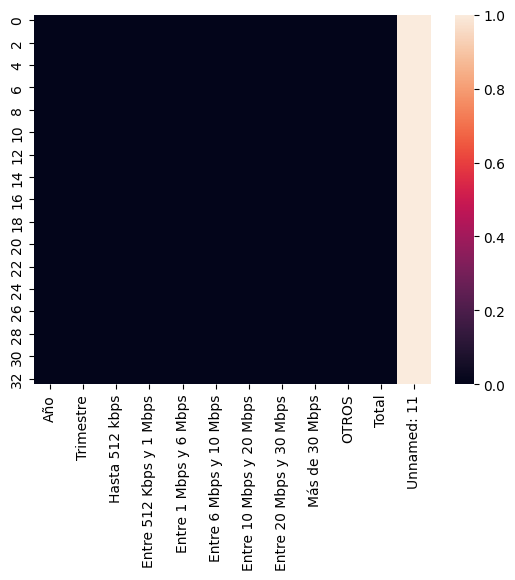

In [478]:
sns.heatmap(distr_totnac_vel.isnull())

In [479]:
distr_totnac_vel.columns

Index(['Año', 'Trimestre', 'Hasta 512 kbps', 'Entre 512 Kbps y 1 Mbps',
       'Entre 1 Mbps y 6 Mbps', 'Entre 6 Mbps y 10 Mbps',
       'Entre 10 Mbps y 20 Mbps', 'Entre 20 Mbps y 30 Mbps', 'Más de 30 Mbps',
       'OTROS', 'Total', 'Unnamed: 11'],
      dtype='object')

Vamos a analizar individualmente los valores de las columnas con la finalidad de entender mejor su contenido y para detectar si hay errores evidentes de carga.

In [480]:
distr_totnac_vel['Año'].unique() # Apreciamos que los datos van del año 2014 al 2022.

array([2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014], dtype=int64)

In [481]:
distr_totnac_vel['Trimestre'].unique() # se aplica a los cuatro trimestres del año.

array([1, 4, 3, 2], dtype=int64)

In [482]:
distr_totnac_vel['Hasta 512 kbps'].unique() # vemos que el punto marca los miles y es necesario corregirlo.

array([ 34890,  41262,  40174,  40172,  39487,  39510,  41038,  42550,
        38272, 241713, 202790, 166573, 138740,   5675,   5972,   7309,
        15041,  19022,  22366,  20653,  20724,  20104,  44008,  30428,
        34243,  35030,  40723,  41158,  44075,  37430,  41064,  52684],
      dtype=int64)

In [483]:
distr_totnac_vel['Entre 512 Kbps y 1 Mbps'].unique()  

array([104840,  28521,  41437,  42024,  41674,  42185,  44005,  48690,
        56170,  28980,  80599,  95980, 195706, 201196, 220589, 219467,
       215406, 221474, 217997, 222766, 230159, 233398, 294413, 384221,
       404810, 427394, 455777, 500175, 516919, 554749, 608018, 656408,
       687619], dtype=int64)

In [484]:
distr_totnac_vel['Entre 1 Mbps y 6 Mbps'].unique() 

array([1263273, 1413208, 2550229, 2531271, 2593477, 2622638, 2637984,
       2651502, 2649819, 2792684, 3309137, 3444458, 3428759, 3349666,
       3401277, 3316868, 3272724, 3773159, 4062226, 4416065, 4584534,
       4673339, 4816081, 5058481, 4944358, 5049640, 5087802, 5138431,
       5121423, 5084556, 5153437, 5149574, 5130294], dtype=int64)

In [485]:
distr_totnac_vel['Entre 6 Mbps y 10 Mbps'].unique()  

array([1209148, 1245333, 1095772, 1080279, 1072722, 1073875, 1040017,
       1053107, 1022014, 1046128, 1026859,  871142,  882836,  882388,
        859413,  979416,  976956, 1005545, 1062810,  990281,  975027,
        971094,  936533,  796998,  762999,  726740,  701187,  645440,
        571620,  496251,  373372,  341689,  289182], dtype=int64)

In [486]:
distr_totnac_vel['Entre 10 Mbps y 20 Mbps'].unique()  

array([ 967508,  976539,  710122,  693277,  737930,  786595,  799350,
        807775,  814470,  851619,  806466, 1169632, 1464748, 1472634,
       1607137, 1905839, 2068087, 1730353, 1592304, 1342000, 1129987,
       1038029,  919208,  785759,  641646,  639011,  539414,  432762,
        348102,  276254,  182483,  147273,  101127], dtype=int64)

In [487]:
distr_totnac_vel['Entre 20 Mbps y 30 Mbps'].unique()  

array([ 509830,  558358,  536364,  647401,  595920,  582420,  538567,
        523437,  532309, 1004083, 1141545, 1250366, 1244215, 1690612,
       1571692, 1000036,  862010,  631946,  353480,  231604,  210668,
        169522,  124564,   73977,   27664,   17568,   13101,   10045,
          7643,    4371,     507,     478,     345], dtype=int64)

In [488]:
distr_totnac_vel['Más de 30 Mbps'].unique()

array([6336187, 6032322, 4948174, 4661291, 4379965, 4239237, 4053461,
       3711499, 3500882, 2831253, 2314898, 1677830, 1138728,  599579,
        524777,  444391,  397977,  337559,  245790,   98635,   47990,
         38590,   31022,   29020,   23380,   22170,   20677,   18529,
         16347,   15229,   12424,   12259,   11595], dtype=int64)

In [489]:
distr_totnac_vel['Total'].unique() 

array([10624009, 10489794, 10085541,  9863084,  9647972,  9571562,
        9356199,  9031056,  8812426,  8793181,  9164684,  8960181,
        8648135,  8473655,  8347035,  8110444,  8037053,  7870222,
        7553629,  7323717,  7199018,  7144696,  7141925,  7172464,
        6835285,  6916766,  6852988,  6786105,  6623212,  6475485,
        6367671,  6348745,  6272846], dtype=int64)

In [490]:
distr_totnac_vel['Unnamed: 11'].unique() # vacio

array([nan])

In [491]:
distr_totnac_vel.drop('Unnamed: 11', axis=1, inplace=True)#Se elimina columna vacía.


**IV.-Total nacional de accesos a Internet fijo por banda ancha y banda angosta.**

Apreciamos que contiene 33 filas, 6 columnas, 3 numéricas y 3 que se refieren a fechas que  probablemente sea necesario vincularlas a un calendario en Powerby.  Periodo es redundante.

Las columnas numéricas  tienen miles con '.' los que se reemplazaran en forma conjunta con la incorporación de los datos. No vemos valores faltantes.

No lo encontramos relavante para el presente proyecto.

In [492]:
totalnac_xbanda.head()


,Año,Trimestre,Banda ancha fija,Dial up,Total,Periodo
0,2022,1,10611390,12619,10624009,Ene-Mar 2022
1,2021,4,10476933,12861,10489794,Oct-Dic 2021
2,2021,3,10075184,10357,10085541,Jul-Sept 2021
3,2021,2,9852702,10382,9863084,Abr-Jun 2021
4,2021,1,9637956,10016,9647972,Ene-Mar 2021


In [493]:
totalnac_xbanda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Año               33 non-null     int64 
 1   Trimestre         33 non-null     int64 
 2   Banda ancha fija  33 non-null     int64 
 3   Dial up           33 non-null     int64 
 4   Total             33 non-null     int64 
 5   Periodo           33 non-null     object
dtypes: int64(5), object(1)
memory usage: 1.7+ KB


<AxesSubplot: >

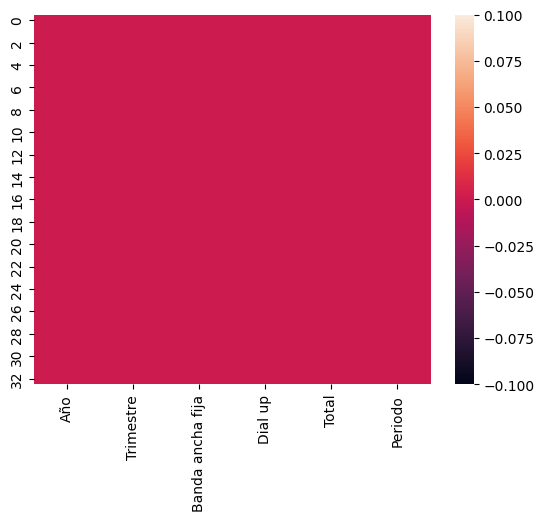

In [494]:
sns.heatmap(totalnac_xbanda.isnull())

Vamos a analizar individualmente los valores de las columnas con la finalidad de entender mejor su contenido y para detectar si hay errores evidentes de carga.

In [495]:
totalnac_xbanda['Año'].unique() # Apreciamos que los datos van del año 2014 al 2022.

array([2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014], dtype=int64)

In [496]:
totalnac_xbanda['Trimestre'].unique() # se aplica a los cuatro trimestres del año.

array([1, 4, 3, 2], dtype=int64)

In [497]:
totalnac_xbanda['Banda ancha fija'].unique()  

array([10611390, 10476933, 10075184,  9852702,  9637956,  9561546,
        9346183,  9021040,  8802435,  8783053,  9142891,  8938427,
        8626323,  8451841,  8320223,  8083533,  8009981,  7842778,
        7696594,  7401134,  7277314,  7223128,  7178340,  7097604,
        6874704,  6952289,  6902267,  6783279,  6699714,  6559172,
        6559264,  6428329,  6362108], dtype=int64)

In [498]:
totalnac_xbanda['Dial up'].unique()

array([12619, 12861, 10357, 10382, 10016,  9991, 10128, 21793, 21754,
       21812, 21814, 26812, 26911, 27072, 27444, 28349, 28530, 28540,
       28545, 28610, 32475, 32652, 32542, 32801, 32909, 38018, 39324,
       36007, 36139, 36290], dtype=int64)

In [499]:
totalnac_xbanda['Total'].unique()

array([10624009, 10489794, 10085541,  9863084,  9647972,  9571562,
        9356199,  9031056,  8812426,  8793181,  9164684,  8960181,
        8648135,  8473655,  8347035,  8110444,  8037053,  7870222,
        7724943,  7429664,  7305854,  7251673,  7206950,  7130079,
        6907356,  6984831,  6935068,  6816188,  6737732,  6598496,
        6595271,  6464468,  6398398], dtype=int64)

In [500]:
totalnac_xbanda['Periodo'].unique()

array(['Ene-Mar 2022', 'Oct-Dic 2021', 'Jul-Sept 2021', 'Abr-Jun 2021',
       'Ene-Mar 2021', 'Oct-Dic 2020', 'Jul-Sept 2020', 'Abr-Jun 2020',
       'Ene-Mar 2020', 'Oct-Dic 2019', 'Jul-Sept 2019', 'Abr-Jun 2019',
       'Ene-Mar 2019', 'Oct-Dic 2018', 'Jul-Sept 2018', 'Abr-Jun 2018',
       'Ene-Mar 2018', 'Oct-Dic 2017', 'Jul-Sept 2017', 'Abr-Jun 2017',
       'Ene-Mar 2017', 'Oct-Dic 2016', 'Jul-Sept 2016', 'Abr-Jun 2016',
       'Ene-Mar 2016', 'Oct-Dic 2015', 'Jul-Sept 2015', 'Abr-Jun 2015',
       'Ene-Mar 2015', 'Oct-Dic 2014', 'Jul-Sept 2014', 'Abr-Jun 2014',
       'Ene-Mar 2014'], dtype=object)

In [501]:
totalnac_xbanda.drop('Periodo', axis=1, inplace=True)

**V.-Ingresos trimestrales por la prestación del servicio de Internet fijo**

Apreciamos que contiene 33 filas, 4 columnas, 1 numéricas y 3 que se refieren a fechas que  probablemente sea necesario vincularlas a un calendario en Powerby. La columna4 es redundante.  

Las columnas numéricas  tienen miles con '.' los que se reemplazaran en forma conjunta con la incorporación de los datos. No vemos valores faltantes.

Nos brinda información concerniente a los ingresos por año y trimestre a nivel nacional. Esto nos permite ver su evolución en el tiempo. 

Es la unica tabla que habla de ingresos y puede ser pertinente para nuestro trabajo.

In [502]:
ingre_trimes.head()


,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2022,1,51432896,Ene-Mar 2022
1,2021,4,45467887,Oct-Dic 2021
2,2021,3,42999944,Jul-Sept 2021
3,2021,2,38239667,Abr-Jun 2021
4,2021,1,36676371,Ene-Mar 2021


In [503]:
ingre_trimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Año                        33 non-null     int64 
 1   Trimestre                  33 non-null     int64 
 2   Ingresos (miles de pesos)  33 non-null     int64 
 3   Periodo                    33 non-null     object
dtypes: int64(3), object(1)
memory usage: 1.2+ KB


<AxesSubplot: >

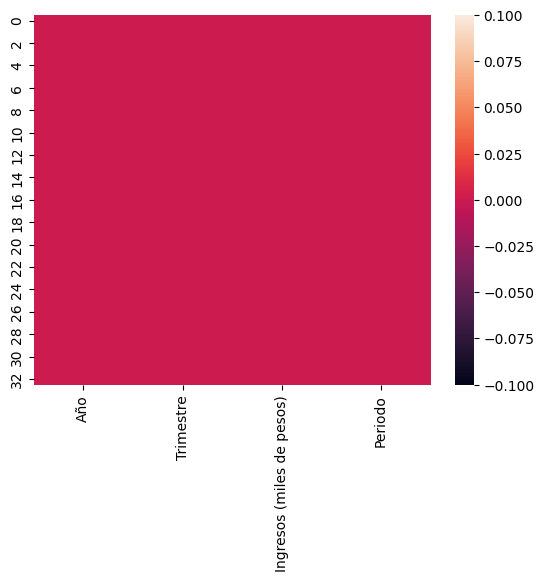

In [504]:
sns.heatmap(ingre_trimes.isnull())

Vamos a analizar individualmente los valores de las columnas con la finalidad de entender mejor su contenido y para detectar si hay errores evidentes de carga.

In [505]:
ingre_trimes['Año'].unique() # Apreciamos que los datos van del año 2014 al 2022.

array([2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014], dtype=int64)

In [506]:
ingre_trimes['Trimestre'].unique() # se aplica a los cuatro trimestres del año.

array([1, 4, 3, 2], dtype=int64)

In [507]:
ingre_trimes['Periodo'].unique() # abarca las 23 provincias y el distrito federal, es decir la totalidad de argentina.

array(['Ene-Mar 2022', 'Oct-Dic 2021', 'Jul-Sept 2021', 'Abr-Jun 2021',
       'Ene-Mar 2021', 'Oct-Dic 2020', 'Jul-Sept 2020', 'Abr-Jun 2020',
       'Ene-Mar 2020', 'Oct-Dic 2019', 'Jul-Sept 2019', 'Abr-Jun 2019',
       'Ene-Mar 2019', 'Oct-Dic 2018', 'Jul-Sept 2018', 'Abr-Jun 2018',
       'Ene-Mar 2018', 'Oct-Dic 2017', 'Jul-Sept 2017', 'Abr-Jun 2017',
       'Ene-Mar 2017', 'Oct-Dic 2016', 'Jul-Sept 2016', 'Abr-Jun 2016',
       'Ene-Mar 2016', 'Oct-Dic 2015', 'Jul-Sept 2015', 'Abr-Jun 2015',
       'Ene-Mar 2015', 'Oct-Dic 2014', 'Jul-Sept 2014', 'Abr-Jun 2014',
       'Ene-Mar 2014'], dtype=object)

In [508]:
ingre_trimes["Ingresos (miles de pesos)"].unique()  

array([51432896, 45467887, 42999944, 38239667, 36676371, 33539703,
       31997445, 32102476, 29946216, 24169251, 21652748, 20743118,
       20207414, 16637687, 15410981, 14319467, 13171459, 11226127,
       10065998,  9678647,  8701201,  7483980,  6912442,  6534241,
        5936845,  5376899,  5153739,  4701791,  4876385,  3950441,
        3478638,  3270816,  2984054], dtype=int64)

In [509]:
ingre_trimes["Ingresos (miles de pesos)"].min()

2984054

In [510]:
ingre_trimes["Ingresos (miles de pesos)"].max()

51432896

In [511]:
ingre_trimes["Ingresos (miles de pesos)"].mean()

17849908.303030305

In [512]:
ingre_trimes.drop('Periodo', axis=1, inplace=True)

**VI.-Serie trimestral de accesos a Internet fijo por tecnología.**

Nos brinda información concerniente a la distribución de las tecnologías utilizadas para el acceso a internet. 

La info suministrada resulta redundante y puede ser suplido con facilidad por otras tablas.


In [513]:
trim_accint_tec.head()


,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
0,2022,1,1533240,6073426,2219533,545814,251996,10624009,Ene-Mar 2022
1,2021,4,1657615,5984240,2072236,523107,252596,10489794,Oct-Dic 2021
2,2021,3,1950631,5826257,1566048,492415,250190,10085541,Jul-Sept 2021
3,2021,2,2018587,5641731,1472246,476968,253552,9863084,Abr-Jun 2021
4,2021,1,2175211,5424782,1362976,434548,250455,9647972,Ene-Mar 2021


In [514]:
trim_accint_tec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           33 non-null     int64 
 1   Trimestre     33 non-null     int64 
 2   ADSL          33 non-null     int64 
 3   Cablemodem    33 non-null     int64 
 4   Fibra óptica  33 non-null     int64 
 5   Wireless      33 non-null     int64 
 6   Otros         33 non-null     int64 
 7   Total         33 non-null     int64 
 8   Periodo       33 non-null     object
dtypes: int64(8), object(1)
memory usage: 2.4+ KB


<AxesSubplot: >

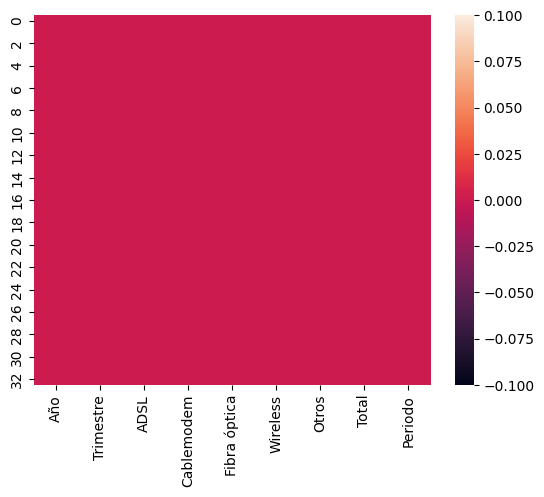

In [515]:
sns.heatmap(trim_accint_tec.isnull())

Vamos a analizar individualmente los valores de las columnas con la finalidad de entender mejor su contenido y para detectar si hay errores evidentes de carga.

In [516]:
trim_accint_tec['Año'].unique() # Apreciamos que los datos van del año 2014 al 2022.

array([2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014], dtype=int64)

In [517]:
trim_accint_tec['Trimestre'].unique() # se aplica a los cuatro trimestres del año.

array([1, 4, 3, 2], dtype=int64)

In [518]:
trim_accint_tec['ADSL'].unique() 

array([1533240, 1657615, 1950631, 2018587, 2175211, 2213949, 2263889,
       2295533, 2299457, 2414575, 2909805, 2990457, 3132789, 3329027,
       3521447, 3557216, 3574294, 3584311, 3622575, 3723518, 3708898,
       3722794, 3776442, 3782085, 3792493, 3803024, 3788696, 3767821,
       3756153, 3764038, 3714764, 3708882, 3697066], dtype=int64)

In [519]:
trim_accint_tec['Cablemodem'].unique() 

array([6073426, 5984240, 5826257, 5641731, 5424782, 5371824, 5259351,
       5005115, 4903674, 4883869, 4800091, 4635575, 4435439, 4313831,
       4238171, 4038141, 3981129, 3818157, 3670221, 3383434, 3276251,
       3210602, 3124855, 3035272, 2806359, 2898226, 2840203, 2756294,
       2668248, 2536219, 2569868, 2461670, 2407330], dtype=int64)

In [520]:
trim_accint_tec['Fibra óptica'].unique()

array([2219533, 2072236, 1566048, 1472246, 1362976, 1311199, 1170879,
       1106725, 1047817,  941295,  852221,  760794,  637099,  388013,
        247366,  226285,  217460,  211425,  193964,  180777,  180146,
        178070,  169898,  167788,  164371,  139187,  162663,  150839,
        168188,  149682,  155494,  149363,  150323], dtype=int64)

In [521]:
trim_accint_tec['Wireless'].unique()

array([545814, 523107, 492415, 476968, 434548, 421554, 413259, 376667,
       352333, 340144, 338241, 308027, 276419, 264299, 246181, 194267,
       165300, 155775, 106443,  85813,  84813,  85119,  81455,  85452,
        85370,  85726,  84530,  82077,  79098,  76984,  85096,  72405,
        70749], dtype=int64)

In [522]:
trim_accint_tec["Otros"].unique() 

array([251996, 252596, 250190, 253552, 250455, 253036, 248821, 247016,
       209145, 213298, 264326, 265328, 166389, 178485,  93870,  94535,
        98870, 100554, 131740,  56122,  55746,  55088,  54300,  59482,
        58763,  58668,  58976,  59157,  66045,  71573,  70049,  72148,
        72930], dtype=int64)

In [523]:
trim_accint_tec["Total"].unique()

array([10624009, 10489794, 10085541,  9863084,  9647972,  9571562,
        9356199,  9031056,  8812426,  8793181,  9164684,  8960181,
        8648135,  8473655,  8347035,  8110444,  8037053,  7870222,
        7724943,  7429664,  7305854,  7251673,  7206950,  7130079,
        6907356,  6984831,  6935068,  6816188,  6737732,  6598496,
        6595271,  6464468,  6398398], dtype=int64)

In [524]:
trim_accint_tec["Periodo"].unique()

array(['Ene-Mar 2022', 'Oct-Dic 2021', 'Jul-Sept 2021', 'Abr-Jun 2021',
       'Ene-Mar 2021', 'Oct-Dic 2020', 'Jul-Sept 2020', 'Abr-Jun 2020',
       'Ene-Mar 2020', 'Oct-Dic 2019', 'Jul-Sept 2019', 'Abr-Jun 2019',
       'Ene-Mar 2019', 'Oct-Dic 2018', 'Jul-Sept 2018', 'Abr-Jun 2018',
       'Ene-Mar 2018', 'Oct-Dic 2017', 'Jul-Sept 2017', 'Abr-Jun 2017',
       'Ene-Mar 2017', 'Oct-Dic 2016', 'Jul-Sept 2016', 'Abr-Jun 2016',
       'Ene-Mar 2016', 'Oct-Dic 2015', 'Jul-Sept 2015', 'Abr-Jun 2015',
       'Ene-Mar 2015', 'Oct-Dic 2014', 'Jul-Sept 2014', 'Abr-Jun 2014',
       'Ene-Mar 2014'], dtype=object)

<h3>3.-Armado de datasets para proyecto.<h3>

En esta etapa vamos a confeccionar dos dataset uno provincial y otra nacional con la información que necesitamos para el proyecto y luego los guardaremos en formato .csv en la carpeta 'Datasets definitivos' para poder trabajar con ellos en power by.

In [525]:
velmed.drop(['Año','Trimestre'], axis=1, inplace=True)
distr_totnac_vel.drop(['Año','Trimestre','Total'], axis=1, inplace=True)
ingre_trimes.drop(['Año','Trimestre'], axis=1, inplace=True)


In [526]:
df_nacional = pd.concat([penet_hog,velmed,distr_totnac_vel,ingre_trimes],axis=1)

In [527]:
df_nacional.head()

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Mbps (Media de bajada),Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Ingresos (miles de pesos)
0,2022,1,73.88,23.05,55.11,34890,104840,1263273,1209148,967508,509830,6336187,198333,51432896
1,2021,4,73.18,22.81,52.34,41262,28521,1413208,1245333,976539,558358,6032322,194251,45467887
2,2021,3,70.58,21.98,48.46,40174,41437,2550229,1095772,710122,536364,4948174,163269,42999944
3,2021,2,69.24,21.55,45.63,40172,42024,2531271,1080279,693277,647401,4661291,167369,38239667
4,2021,1,67.95,21.13,43.11,39487,41674,2593477,1072722,737930,595920,4379965,186797,36676371


penet_100hog =/Datasets/dataset/Penetración de Internet fijo (accesos por cada 100 hogares)')#Primer kpi



acc_ranvelyprov = Acceso a Internet Fijo por rangos de velocidad de bajada y provincia
velmed_xprov = Velocidad media de bajada de Internet fijo por provincia
acc_tecyprov =Acceso a Internet fijo por tecnología y provincia




In [528]:
velmed_xprov.drop(['Año','Trimestre','Provincia'], axis=1, inplace=True)
acc_ranvelyprov.drop(['Año','Trimestre','Provincia','Total'], axis=1, inplace=True)
acc_tecyprov.drop(['Año','Trimestre','Provincia','Total'], axis=1, inplace=True)

In [530]:
df_provincial = pd.concat([penet_100hog,velmed_xprov,acc_ranvelyprov,acc_tecyprov],axis=1)

In [531]:
df_provincial

,Año,Trimestre,Provincia,Accesos por cada 100 hogares,Mbps (Media de bajada),HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,ADSL,Cablemodem,Fibra óptica,Wireless,Otros
0,2022,1,Buenos Aires,76.08,63,31591,30056,313382,321756,290127,161183,3381049,26280.0,392045.0,2728865,1242121,125521,66872.0
1,2022,1,Capital Federal,111.80,88,527,5575,39918,77390,61053,43289,1188072,1717.0,102290.0,1217225,62308,5784,29934.0
2,2022,1,Catamarca,58.21,51,71,456,4386,7009,8773,3761,35715,2207.0,14181.0,15517,29118,1328,2234.0
3,2022,1,Chaco,44.06,46,461,1099,16888,21235,20898,13012,62946,7580.0,32391.0,64546,36662,8164,2356.0
4,2022,1,Chubut,88.05,13,113,1677,61369,31856,33080,13871,14055,15607.0,44133.0,66667,9184,30592,21052.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,2014,1,Santa Cruz,28.94,3,161,1625,24972,1,1,0,0,0.0,18927.0,100,381,4092,3264.0
788,2014,1,Santa Fe,47.85,3,8456,124468,345225,20328,6845,23,668,0.0,322662.0,174296,3059,5951,644.0
789,2014,1,Santiago Del Estero,16.31,3,1234,10531,22817,2422,109,0,0,0.0,32567.0,3598,19,915,34.0
790,2014,1,Tierra Del Fuego,63.97,3,12,607,30902,6,0,0,0,0.0,21618.0,2837,648,1,2934.0
